In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading data from Boulder for the most recent available window
df = pd.read_excel('Boulder_2004_2014_100meter.xlsx',sheet_name='Data')
df

,row,flt#,Year,Month,Day,Hour,Level,Press,Alt,Pottp,Temp,FtempV,Hum,OzoneMpa,Oz ppm,ozoneatmcm,Ptemp,O3 # DN,O3 Res
0,200805,bl829,2004,1,8,21,17,826.8,1.743,298.0,9.1,-7.6,28,3.64,0.044,0.0000,28.2,9.338,287
1,200806,bl829,2004,1,8,21,18,821.1,1.800,297.5,8.1,-8.8,27,3.84,0.047,0.0002,28.2,9.902,286
2,200807,bl829,2004,1,8,21,19,811.2,1.900,297.6,7.2,-9.7,26,3.80,0.047,0.0006,28.2,9.810,286
3,200808,bl829,2004,1,8,21,20,801.4,2.000,297.9,6.5,-10.7,25,3.79,0.047,0.0009,28.2,9.817,286
4,200809,bl829,2004,1,8,21,21,791.6,2.100,297.8,5.4,-10.8,27,3.81,0.048,0.0013,28.2,9.900,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172736,384197,bu507,2014,3,20,17,292,13.1,29.200,766.1,-51.3,999.9,999,9.42,7.205,0.2712,14.3,30.730,75
172737,384198,bu507,2014,3,20,17,293,12.9,29.300,770.2,-51.1,999.9,999,9.27,7.202,0.2723,14.2,30.217,74
172738,384199,bu507,2014,3,20,17,294,12.7,29.400,773.9,-51.0,999.9,999,9.05,7.144,0.2734,14.2,29.504,73
172739,384200,bu507,2014,3,20,17,295,12.5,29.500,776.7,-51.2,999.9,999,8.90,7.130,0.2745,14.2,29.009,72


In [37]:
#indexing data according to data; using June 19, 2007 and June 17, 2009 (peak insolation in Boulder)
#also I have to index to avoid datapoints where Pressure = 9999.9 (not sure why they're there in the first place)
index1 = (df['Year'] == 2007)&(df['Month']==6)&(df['Day']==19)&(df['Press']!=9999.9)
data1 = df[index1][:len(df[index1])-1]
index2 = (df['Year'] == 2009)&(df['Month']==6)&(df['Day']==17)&(df['Press']!=9999.9)
data2 = df[index2][:len(df[index1])-1]
print(data2)

          row   flt#  Year  Month  Day  Hour  Level  Press     Alt  Pottp  \
98419  305236  bu227  2009      6   17    18     17  821.4   1.743  311.7   
98420  305237  bu227  2009      6   17    18     18  816.0   1.800  311.4   
98421  305238  bu227  2009      6   17    18     19  806.6   1.900  311.3   
98422  305239  bu227  2009      6   17    18     20  797.2   2.000  311.3   
98423  305240  bu227  2009      6   17    18     21  788.0   2.100  311.3   
...       ...    ...   ...    ...  ...   ...    ...    ...     ...    ...   
98711  305528  bu227  2009      6   17    18    309   10.9  30.900  852.4   
98712  305529  bu227  2009      6   17    18    310   10.8  31.000  857.8   
98713  305530  bu227  2009      6   17    18    311   10.6  31.100  861.3   
98714  305531  bu227  2009      6   17    18    312   10.4  31.200  864.8   
98715  305532  bu227  2009      6   17    18    313   10.3  31.300  868.9   

       Temp  FtempV  Hum  OzoneMpa  Oz ppm  ozoneatmcm  Ptemp  O3 # DN  O3 

In [59]:
#now we want to convert from O3 in ppm to O3 in molec cm^(-3)
#to do this, we will first calculate the density of air using n/V = P/RT

R = 83145 #(cm^3•hPa•K^-1•mol^-1)

#gleaning pressure (in hPa), ozone (in ppm), and temp (in °C) data from dataframe
press1 = data1['Press']
t1 = data1['Temp']
press2 = data2['Press']
t2= data2['Temp']
o3_conc1 = data1['Oz ppm']
o3_conc2 = data2['Oz ppm']

#function to convert T data from C to K
def c_to_k(T):
    tk = []
    for i in range(len(T)):
        tk.append(T.iloc[i]+273) #appends temperature + 273 to a new list
    return tk

t1k = c_to_k(t1)
t2k = c_to_k(t2)
#function to convert ppm O3 to molec cm^-3 O3
def o3_num(P, T, O): #inputs are P, T, and O3 ppm 
    #converting from the pd.Series datatype to a list so I can iterate through it and access normally
    plist = list(P)
    olist = list(O)
    ppm_list = []
    for i in range(len(T)):
        #glean P data at a certain row of the dataframe 
        #then calculate density of air (molec cm^-3) for that row
        p = plist[i]
        nv = p/(R*T[i])
        #calculate number density of O3 (molec cm^-3) for this row of data and append to new list
        ppm = nv*1e6*olist[i]
        ppm_list.append(ppm)
    return ppm_list

#calculating O3 number densities for the two selected dates
o3_num1 = o3_num(press1,t1k,o3_conc1)
o3_num2 = o3_num(press2,t2k,o3_conc2)

Text(0, 0.5, 'Pressure (hPa)')

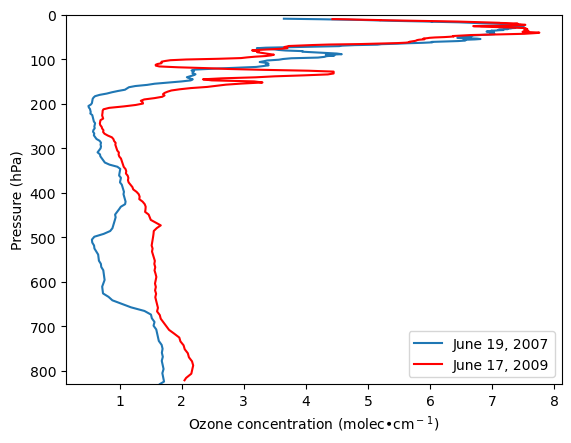

In [63]:
#quick figure (O3 vs. pressure) with both datasets
plt.plot(o3_num1,press1,label='June 19, 2007')
plt.plot(o3_num2,press2,label='June 17, 2009',color='r')
plt.legend()
plt.ylim(830,0)
plt.xlabel('Ozone concentration (molec•cm$^-$$^1$)')
plt.ylabel("Pressure (hPa)")

Text(0, 0.5, 'Pressure (hPa)')

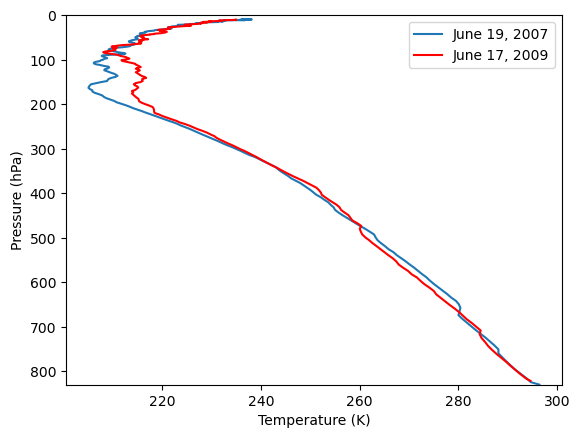

In [64]:
#quick figure (T vs. pressure) with both datasets
plt.plot(t1k,press1,label='June 19, 2007')
plt.plot(t2k,press2,label='June 17, 2009',color='r')
plt.legend()
plt.ylim(830,0)
plt.xlabel('Temperature (K)')
plt.ylabel("Pressure (hPa)")